In [1]:
%matplotlib inline

# How to Find What TESS targets were Observed

There are a number of ways to check if your target of interest was observed in the TESS field of view. This talk will review the options. 

TESS reads out the full frame images (FFIs) with a cadence of 30 min in the prime mission (years 1-2), 10 min is the first mission extension (years 3-4), and 200 sec beginning in the second mission extension (years 5+). Cutouts from the FFI data can be extracted to obtain lightcurves for any observed target. 

In addition, pixels around pre-selected targets are extracted at a shorter cadence (2 min or, beginning in the first mission extension, 20 sec). Many of the below methods can also be used to see if any of these higher cadence data products are available for a given target. 

The various tools are designed for different use cases. The table below summarizes the features of the different methods we will cover in this tutorial. The columns are as follows:
- Multiple Targets - whether or not users can search for many targets at the same time or only a single target
- Past Sectors - whether or not the method can provide a list of sectors a target has already been observed in
- Future Sectors - whether or not the method can provide a list of sectors a target is scheduled to be observed in
- Data Products - whether or not the method provides information on what data products are available (FFIs, 2-min, 20-s)
- Target Properties - whether or not the method provides additional information about the target itself
- Download Data - whether or not the method allows you to download existing data products

| | Search method | Multiple Targets | Past Sectors | Future Sectors | Data Products | Target Properties | Download Data |
|---:|:-----------------------:|:-----------:|:-----------:|:------:|:------:|:------:|:------:|
| 1 | TESS-point Web Tool      | yes | yes | yes | no  | no  | no  |
| 2 | TESS-point command line  | yes | yes | yes | no  | no  | no  |
| 3 | ticinfo                  | no  | yes | yes | yes | yes | no  | 
| 4 | lksearch                 | no  | yes | no  | yes | no  | yes | 
| 5 | lightkurve               | no  | yes | no  | yes | no  | yes | 
| 6 | MAST web portal          | no  | yes | no  | yes | no  | yes |
| 7 | TESScut                  | no  | yes | no  | FFI only | no  | yes |


The following sections give more details on how to access and use all of the above tools.

## 1) TESS-point Web Tool

https://heasarc.gsfc.nasa.gov/wsgi-scripts/TESS/TESS-point_Web_Tool/TESS-point_Web_Tool/wtv_v2.0.py/



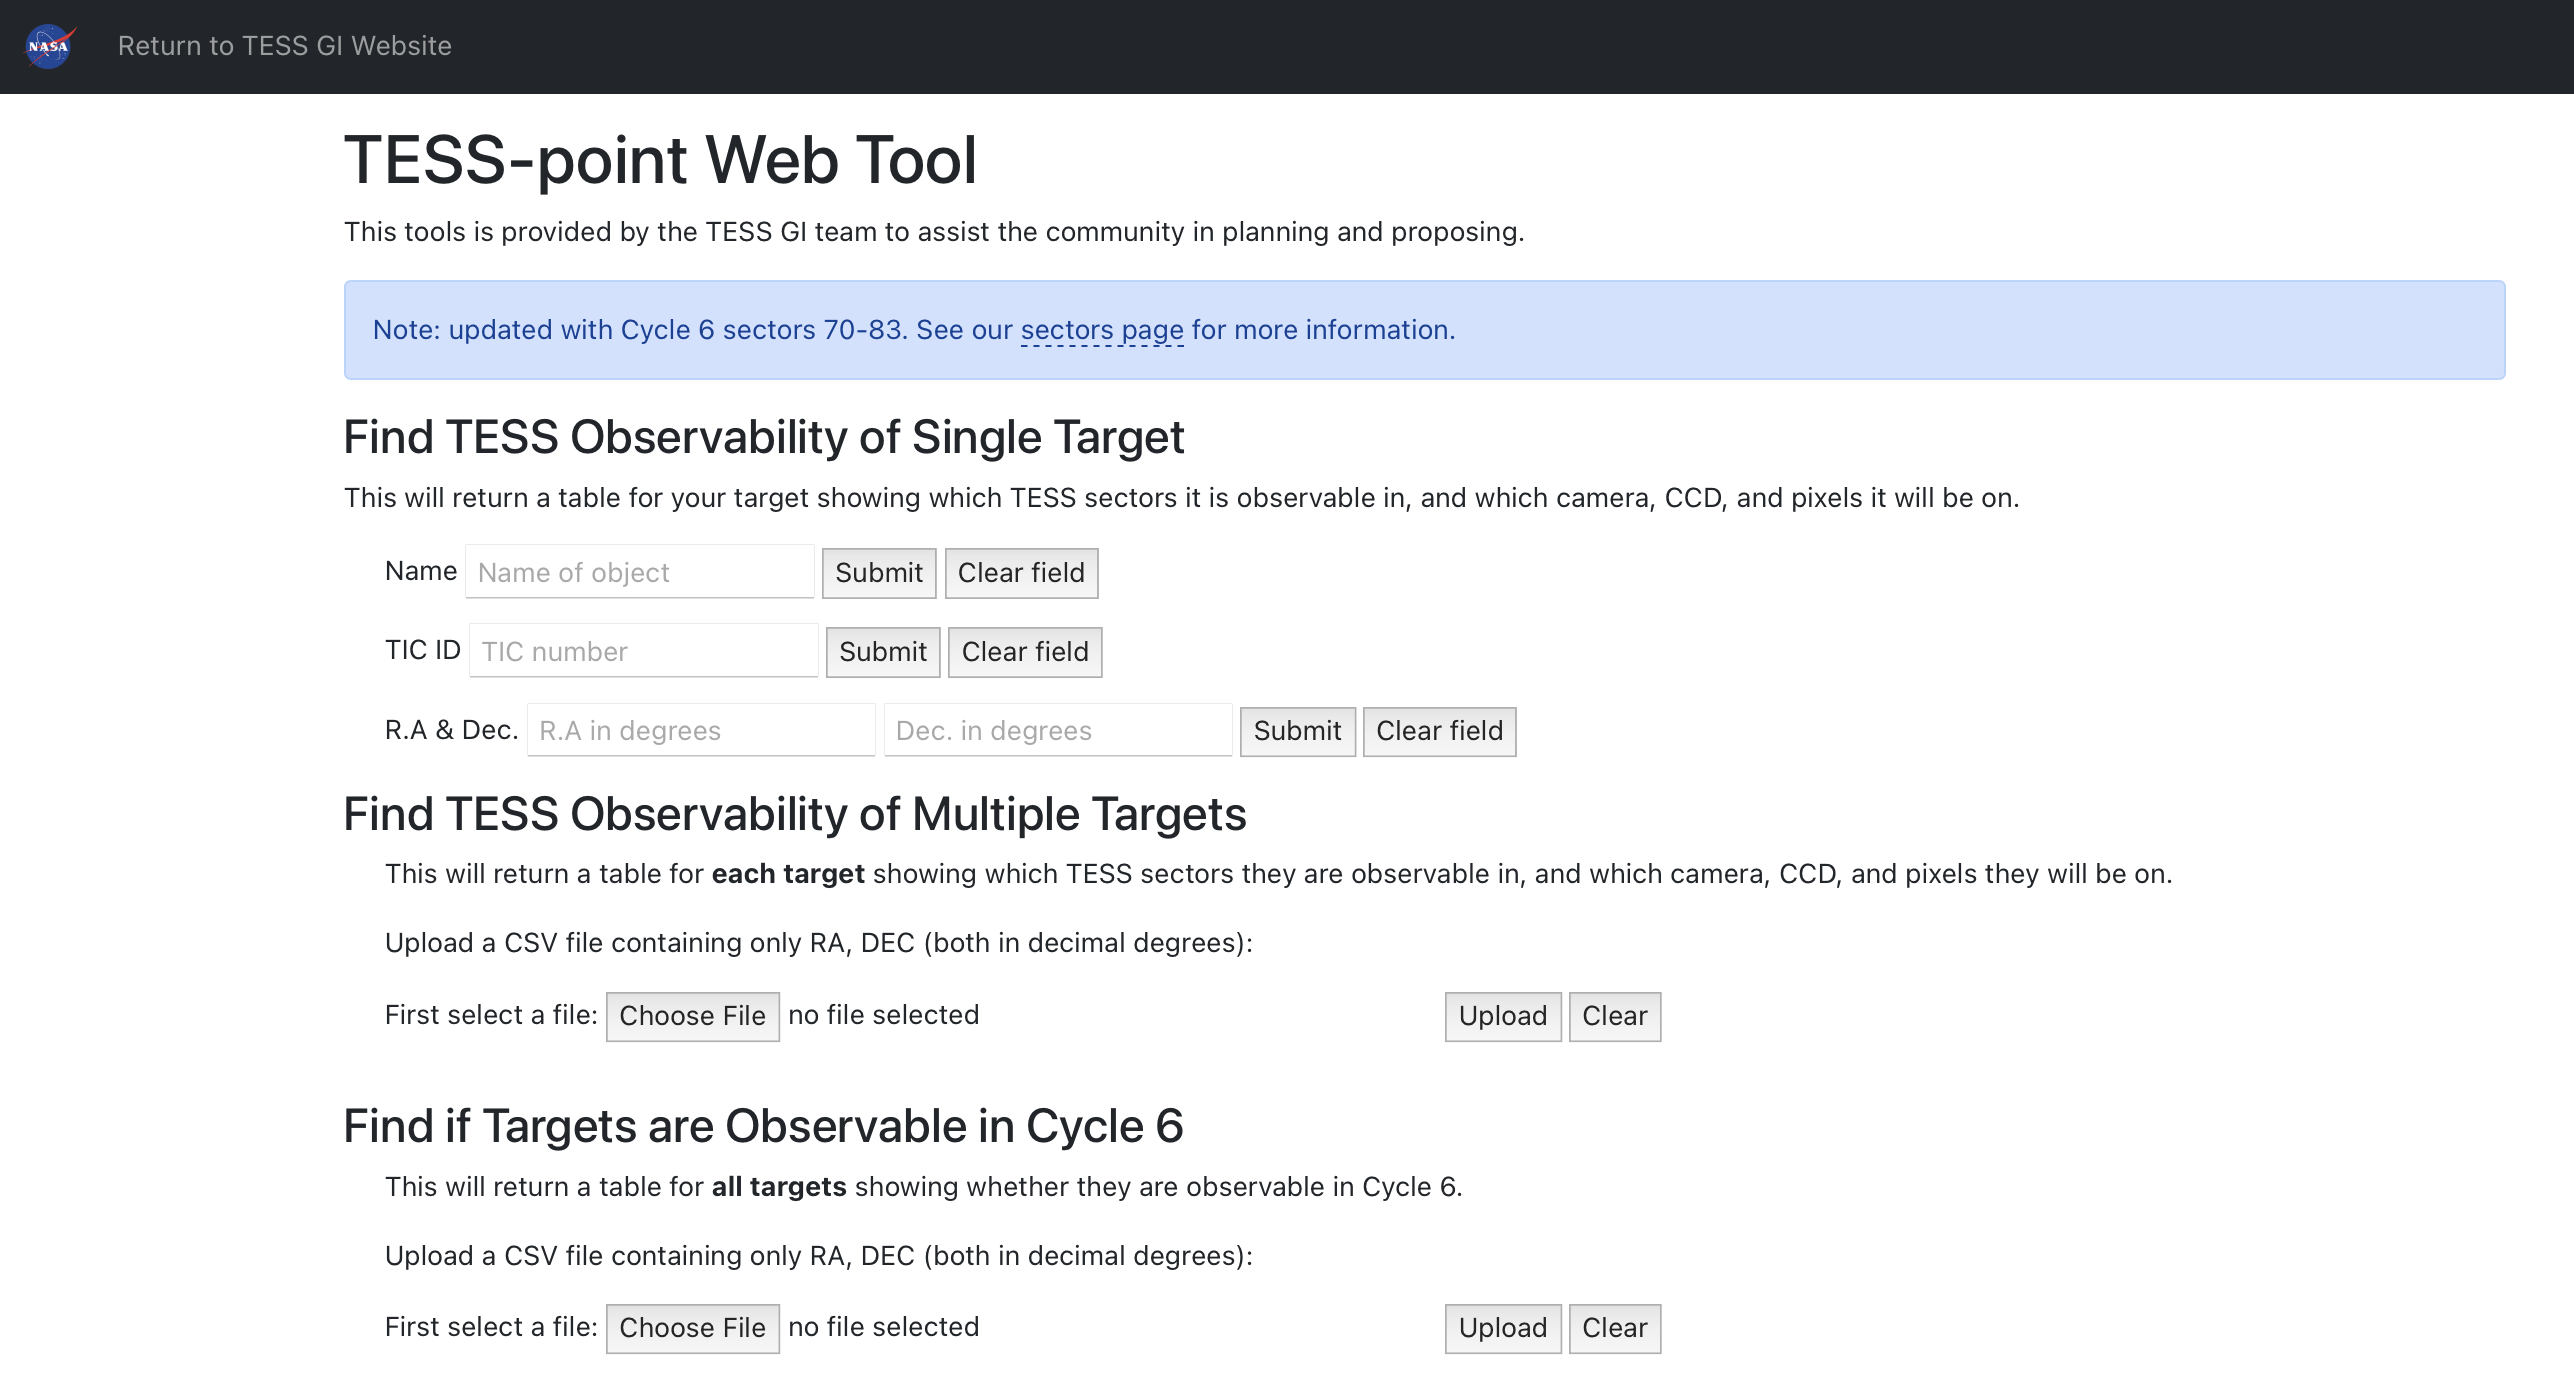

If you search one target, you will get a list of sectors in which the target was observed, as well as information on which camera, ccd, pixel row, and pixel column the target is projected to fall on. 

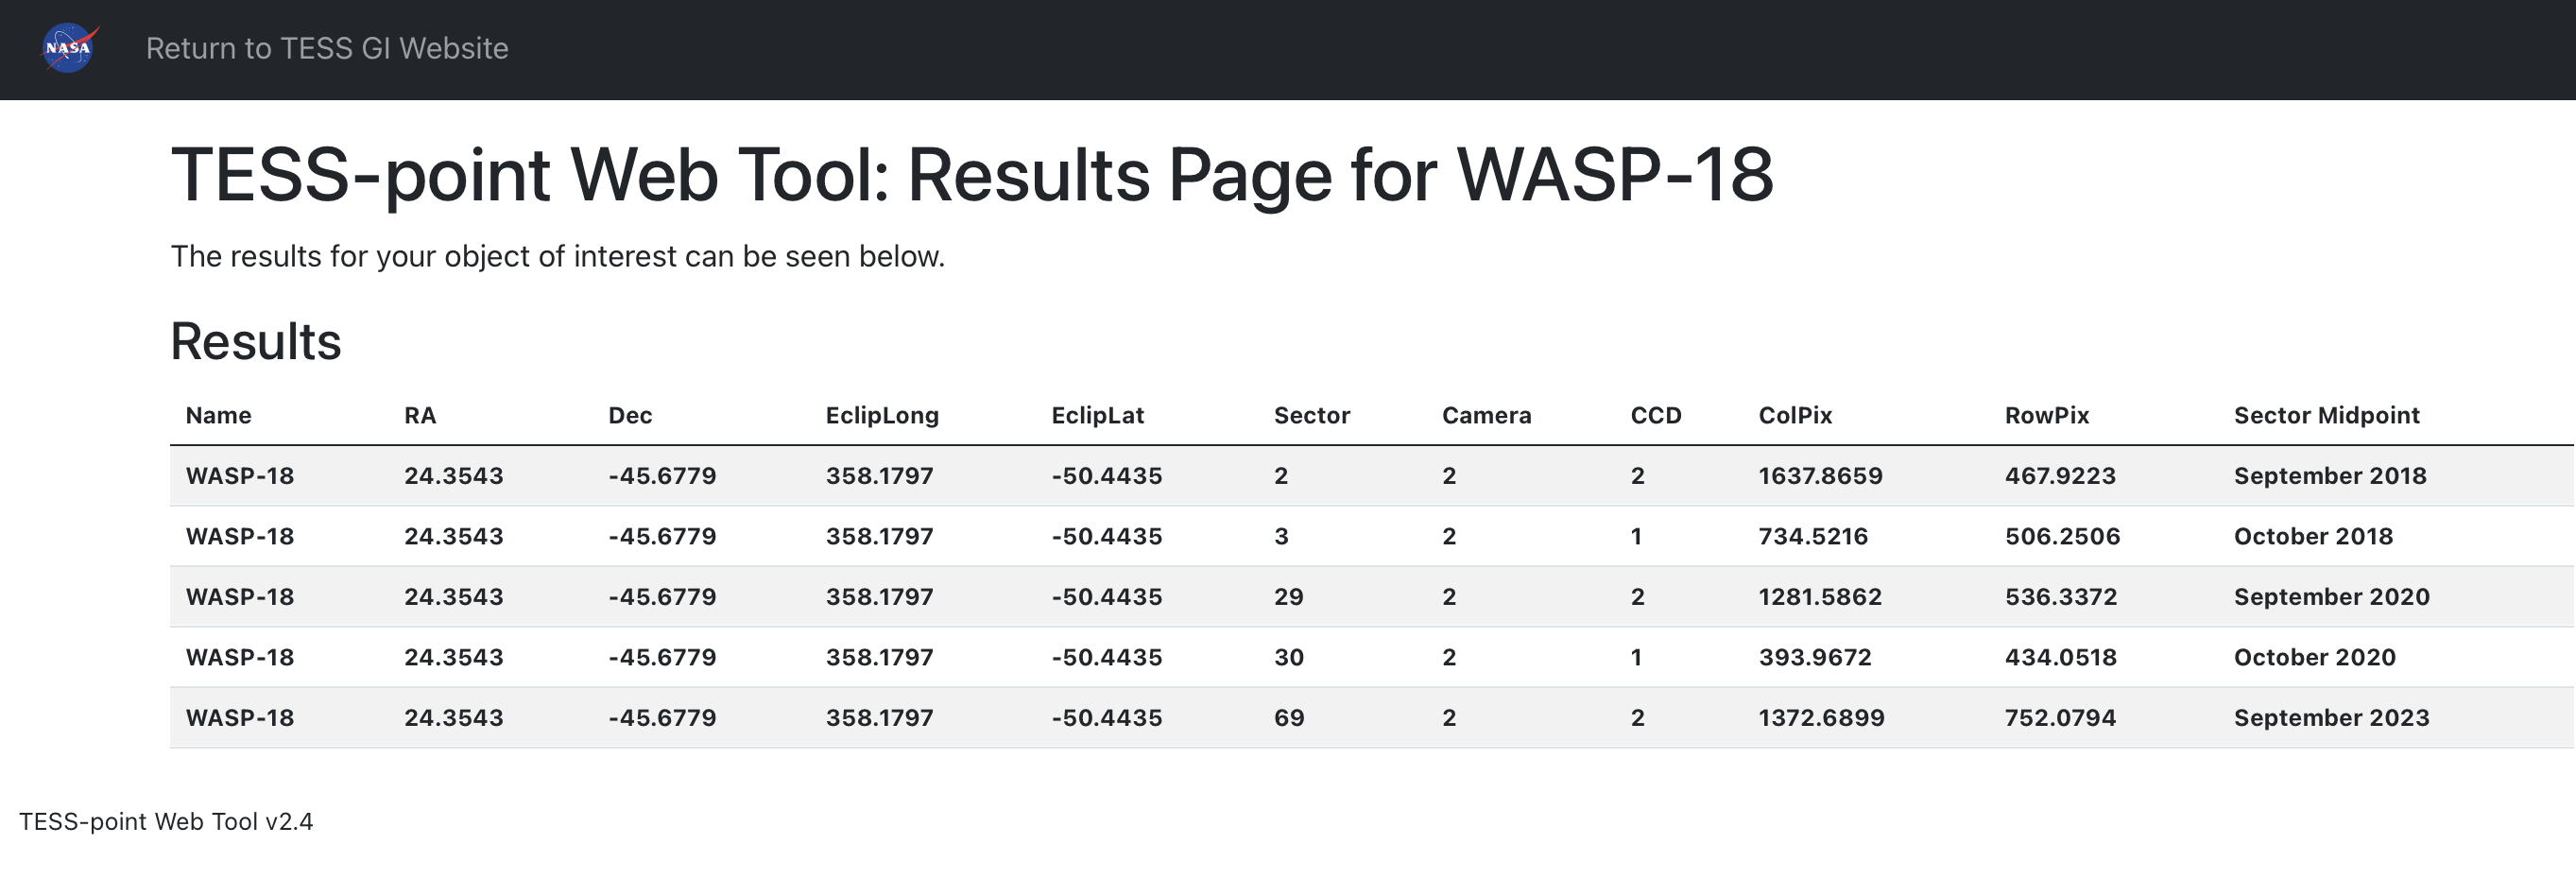

You can also create a csv file containing *only* the RA and Dec measurements for your targets. 

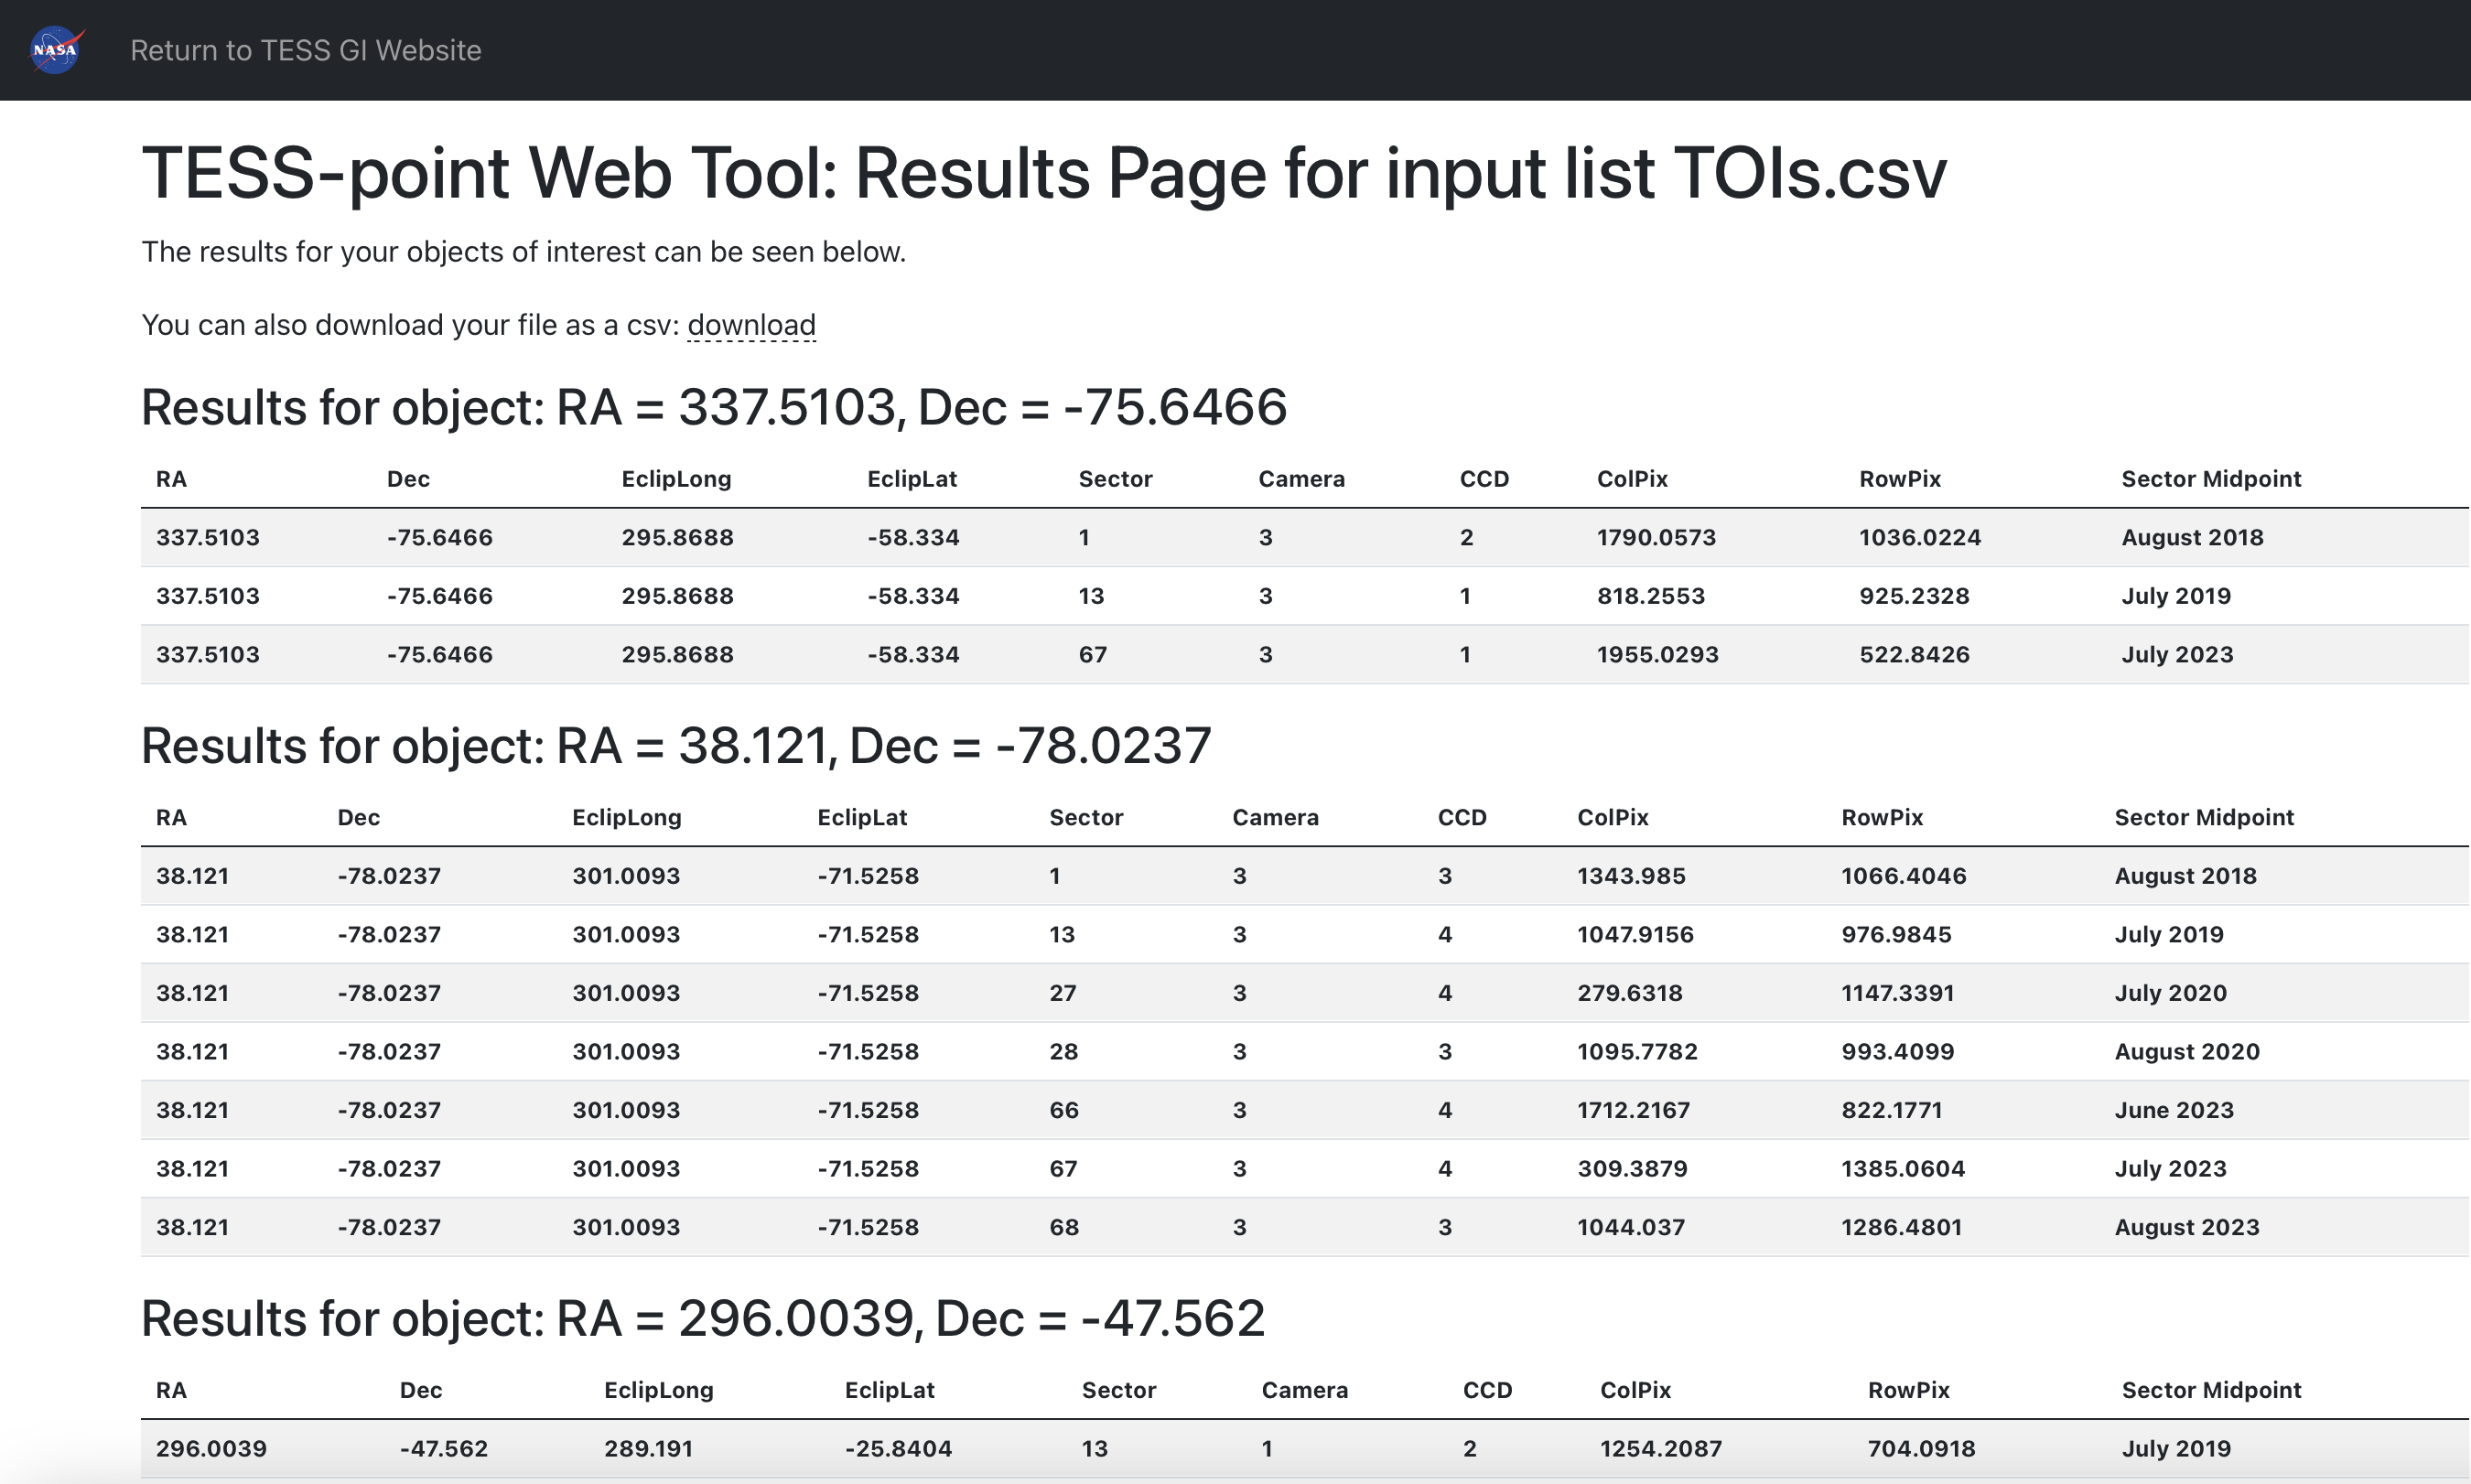

You can also specifically search whether the targets will be observable in the upcoming cycle (currently Cycle 8). This is a useful option to prepare your TESS proposals. In the below example, I imported a csv file that contained the RA/Dec of all TOIs (Note the results have een truncated). 

On the right hand side there is an Edge warning column. This is because the uncertainty of the pixel location can vary by ~2 pixels. If the target is within 2 pixels of the edge, it is not guaranteed that the target will be observed, so this possibility should be taken into account if proposing for a target where this flag is True. 

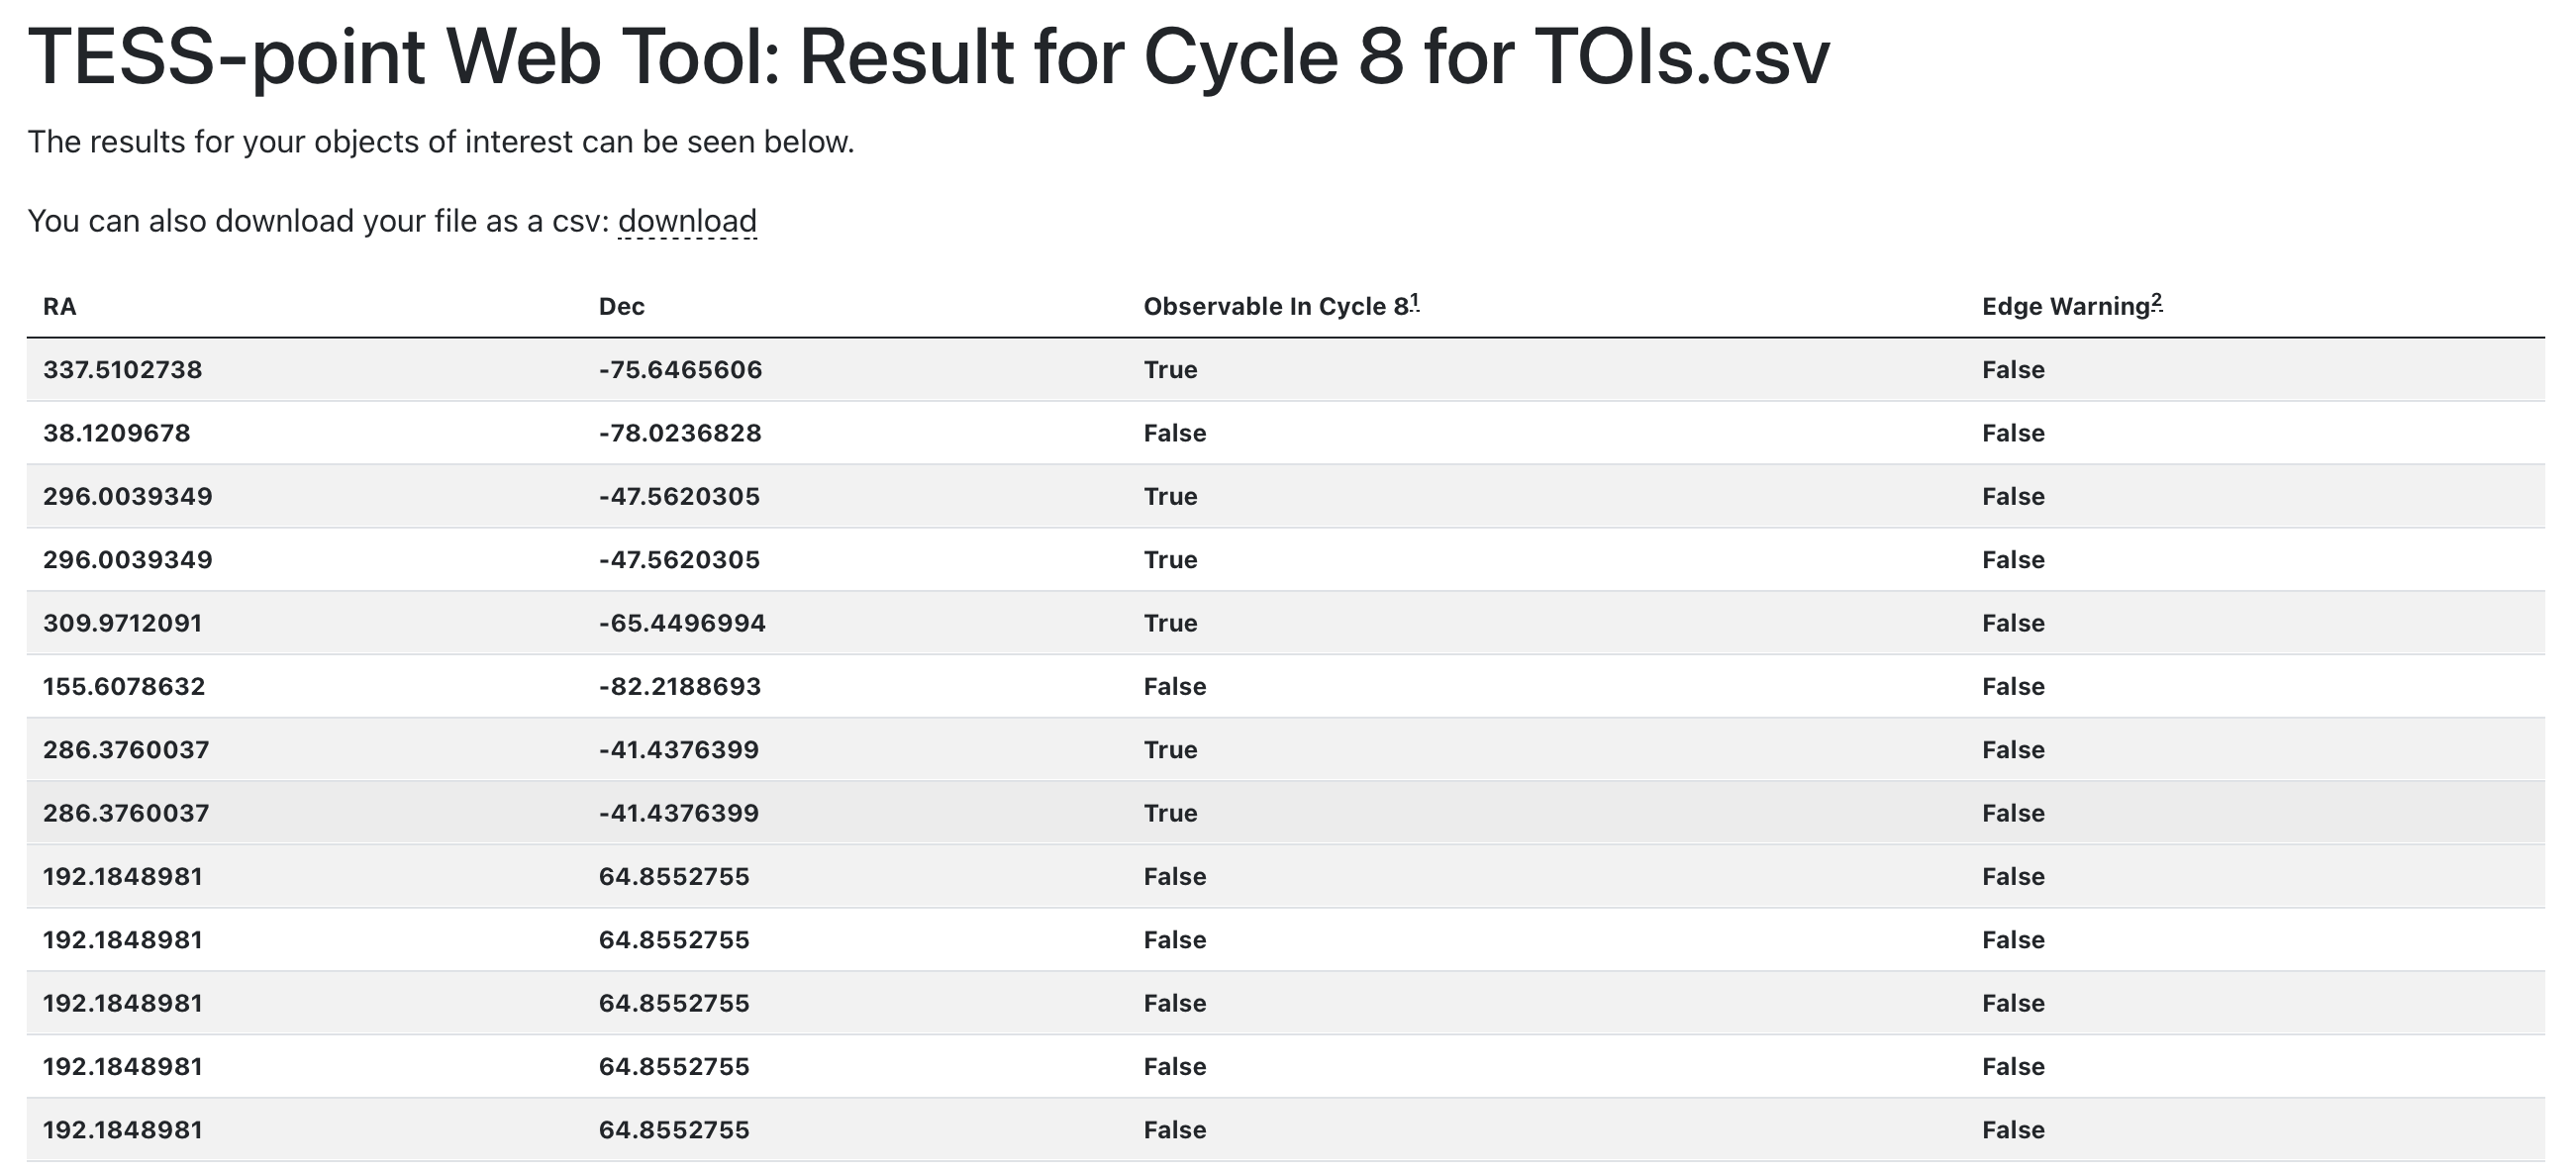

# 2) TESS-Point

https://github.com/tessgi/tess-point

The TESS-Point web tool provides similar functionality to the web tool, enabling the search of either a single target or a list of targets from a csv file. Search input option flags specify what format the target is provided in. 

-n = name\
-f = file\
-t = TIC id\
-c = coord

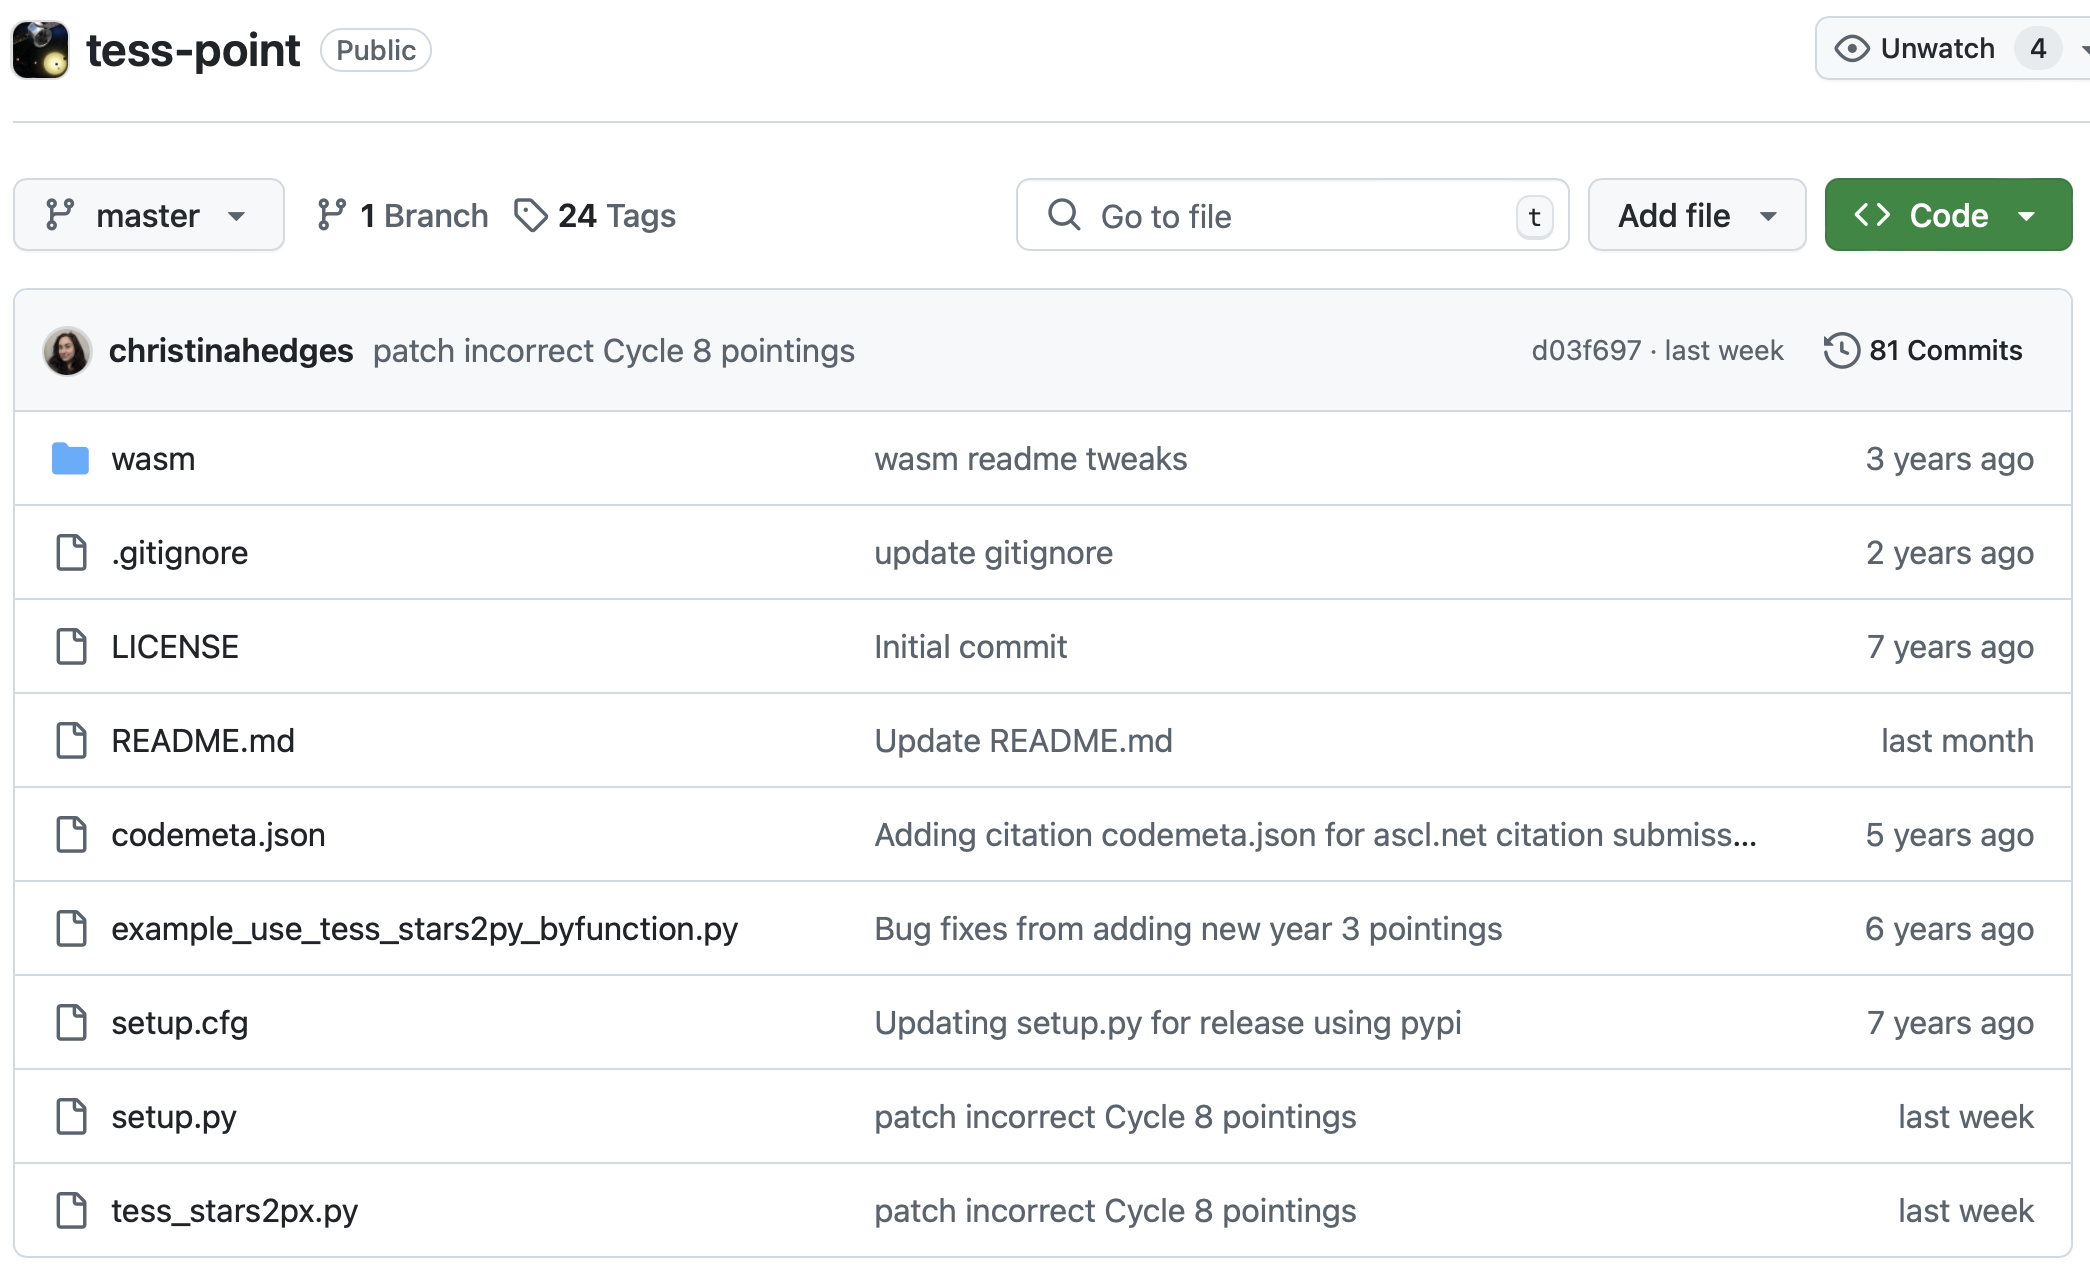

In [1]:
! python -m tess_stars2px -n wasp-18

Coordinates for wasp-18: (24.35430533278999, -45.67788186596)
# TIC     |   RA      |   Dec     | EclipticLong | EclipticLat | Sector | Camera | Ccd | ColPix | RowPix | EdgeWarn
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 |  2 | 2 | 2 | 1637.865949 |  467.922300 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 |  3 | 2 | 1 |  734.521586 |  506.250644 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 29 | 2 | 2 | 1281.586194 |  536.337169 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 30 | 2 | 1 |  393.967200 |  434.051846 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 69 | 2 | 2 | 1372.689884 |  752.079389 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 96 | 2 | 2 | 1885.424534 |  630.806097 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 103 | 4 | 3 |  660.918154 |  244.035249 | 0
000000000 |  24.354305 | -45.677882 | 358.175814 | -50.443544 | 104 | 4 

In [3]:
# Note for the command line tess-point, your file must have 3 columns (TIC, RA, Dec)
! python -m tess_stars2px -f planetRA_Dec.txt

# TIC     |   RA      |   Dec     | EclipticLong | EclipticLat | Sector | Camera | Ccd | ColPix | RowPix | EdgeWarn
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 |  1 | 2 | 2 |  674.973843 | 1248.323619 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 28 | 2 | 2 |  128.508960 | 1272.908426 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 68 | 2 | 2 |  207.886428 | 1524.106935 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 95 | 2 | 2 |  645.631017 | 1493.710754 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 102 | 4 | 3 | 1867.500860 | 1116.718981 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 103 | 4 | 1 | 1645.041397 |  241.543589 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 104 | 3 | 1 | 1851.995242 | 1418.217535 | 0
000000000 | 349.559266 | -56.903986 | 321.700803 | -46.824860 | 105 | 2 | 1 | 1252.243393 | 1492.438192 | 0
000000000 |   4.447163 |

## 3) ticinfo

https://github.com/tessgi/ticinfo

If you want more information about a target, you can use ticinfo. This package returns a printout of some key parameters, such as the temperature and magnitude of the star. With additional flags, ticinfo can tell you which sectors have FFI, 2-min, and 20-s data available on MAST or what upcoming sectors it will be observed in. 

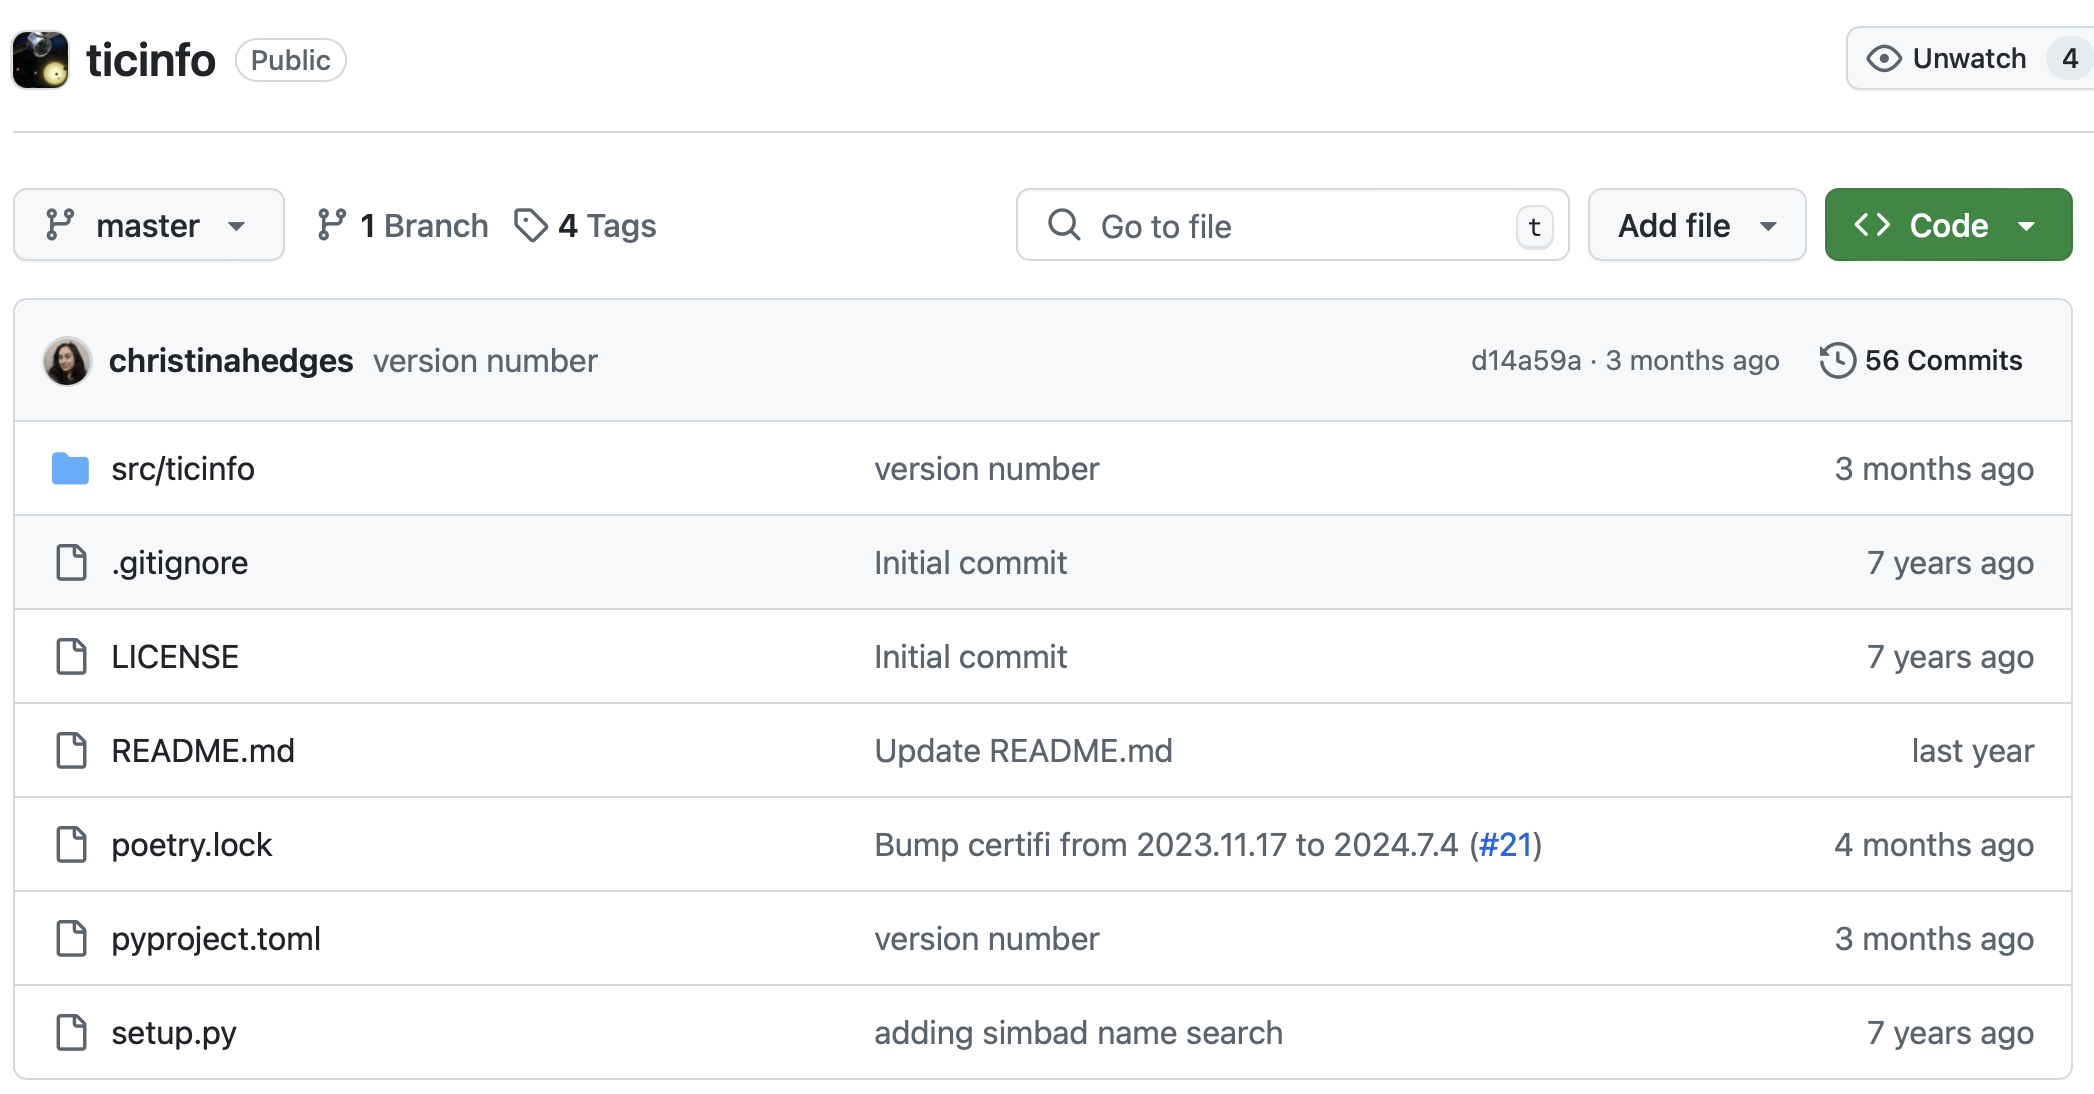



In [4]:
# ticinfo is currently not pre-installed on TIKE, so you may need to run this first.
# pip install ticinfo

In [5]:
# you can use either a name, TIC number, or coordinates to run the search. 
! toco wasp 18

⠹ Searching for target...0m
Target name: HD  10069c                                                         
The target is in constellation Phoenix                                          
                                                                                
    ID       ra       dec    plx  Tmag Vmag Kmag  Teff    rad   mass            
--------- -------- --------- ---- ---- ---- ---- ------ ------- ----            
100100827 24.35431 -45.67788 8.07 8.83 9.28 8.13 6226.0 1.34658  1.2            
                                                                                


In [6]:
# the -s flag also returns what data is currently stored by the MAST archive
! toco wasp 18 -s

⠙ Searching for target...0m
Target name: HD  10069c                                                         
The target is in constellation Phoenix                                          
                                                                                
    ID       ra       dec    plx  Tmag Vmag Kmag  Teff    rad   mass            
--------- -------- --------- ---- ---- ---- ---- ------ ------- ----            
100100827 24.35431 -45.67788 8.07 8.83 9.28 8.13 6226.0 1.34658  1.2            
                                                                                
⠧ Searching for TESS Data Product Availability...0m
Stored: Object observable in archived TESS FFIs during sectors:   [ 2  3 29 30  
69]                                                                             
Stored: FFI light curve data at MAST for sectors:   []                          
Stored: 2-min light curve data at MAST for sectors: [2, 3, 29, 30, 69]          
Stored: 20-s light curve data

In [7]:
# The -f flag also returns any future scheduled observations of the target
! toco wasp 18 -f

⠙ Searching for target...0m
Target name: HD  10069c                                                         
The target is in constellation Phoenix                                          
                                                                                
    ID       ra       dec    plx  Tmag Vmag Kmag  Teff    rad   mass            
--------- -------- --------- ---- ---- ---- ---- ------ ------- ----            
100100827 24.35431 -45.67788 8.07 8.83 9.28 8.13 6226.0 1.34658  1.2            
                                                                                
⠴ Determining observability in Cycle 7...0m
Future: Will be observable in Cycle 7 sectors:  [96]                            


## 4) lksearch
### * New this year! *

https://github.com/lightkurve/lksearch

This is a new package under the lightkurve umbrella that only foucuses on searching for available data products for TESS (and Kepler/K2).

One advantage of lksearch is that it allows you to download data from the cloud. It also allows for cross catalog searches. The following cells highlight some key features, but you can use lksearch in many different ways. Please see the [tutorials](https://github.com/lightkurve/lksearch/tree/main/docs/tutorials) for more information.

In [8]:
import lksearch 

In [9]:
# Search for all data products available for download from MAST
sr = lksearch.TESSSearch('WASP 18')
sr

TESSSearch object containing 90 data products 
   target_name pipeline mission  sector  exptime  distance  year  \
0    100100827     SPOC    TESS       2    120.0       0.0  2018   
1    100100827     SPOC    TESS       2    120.0       0.0  2018   
2    100100827     SPOC    TESS       2    120.0       0.0  2018   
3    100100827     SPOC    TESS       2    120.0       0.0  2018   
4    100100827     SPOC    TESS       2    120.0       0.0  2018   
..         ...      ...     ...     ...      ...       ...   ...   
85   100100827    CDIPS    HLSP      29   1800.0       0.0  2020   
86   100100827      QLP    HLSP      29    600.0       0.0  2020   
87   100100827    CDIPS    HLSP      30   1800.0       0.0  2020   
88   100100827      QLP    HLSP      30    600.0       0.0  2020   
89   100100827      QLP    HLSP      69    200.0       0.0  2023   

                    description  
0   full data validation report  
1   full data validation report  
2   Data validation mini report  
3   Data validation mini report  
4            TCE summary report  
..                          ...  
85                         FITS  
86                         FITS  
87                         FITS  
88                         FITS  
89                         FITS  

[90 rows x 8 columns]

In [10]:
# Check what sectors the target was observed in Full Frame Images
#sr.tesscut

# Check what sectors have available target pixel files
#sr.cubedata

# Check what sectors have available lightcurves
sr.timeseries

# Check what High Level Science products are available
#sr.HLSPs

# Check what mission products (i.e. products from the SPOC pipeline) are available
#sr.mission_products

TESSSearch object containing 30 data products 
   target_name pipeline mission  sector  exptime  distance  year   description
0    100100827     SPOC    TESS       2    120.0       0.0  2018  Light curves
1    100100827     SPOC    TESS       3    120.0       0.0  2018  Light curves
2    100100827     SPOC    TESS      29     20.0       0.0  2020  Light curves
3    100100827     SPOC    TESS      29    120.0       0.0  2020  Light curves
4    100100827     SPOC    TESS      30     20.0       0.0  2020  Light curves
..         ...      ...     ...     ...      ...       ...   ...           ...
25   100100827    CDIPS    HLSP      29   1800.0       0.0  2020          FITS
26   100100827      QLP    HLSP      29    600.0       0.0  2020          FITS
27   100100827    CDIPS    HLSP      30   1800.0       0.0  2020          FITS
28   100100827      QLP    HLSP      30    600.0       0.0  2020          FITS
29   100100827      QLP    HLSP      69    200.0       0.0  2023          FITS

[30 rows x 8 columns]

In [11]:
# Download the first 3 data products in the search result from the cloud. 
sr.timeseries[:3].download(cloud_only = True)

Local Path    Status Message   URL
0  /Users/nthom/.lksearch/cache/mastDownload/TESS...  COMPLETE    None  None
1  /Users/nthom/.lksearch/cache/mastDownload/TESS...  COMPLETE    None  None
2  /Users/nthom/.lksearch/cache/mastDownload/TESS...  COMPLETE    None  None

You can chain commands to get products you are interested in. For example, the following cell gets all of the lightcurves that were generated by the mission (SPOC) pipeline and prints the url for the cloud storage location. 

In [12]:
sr.timeseries.mission_products.cloud_uris

0    s3://stpubdata/tess/public/tid/s0002/0000/0001...
1    s3://stpubdata/tess/public/tid/s0003/0000/0001...
2    s3://stpubdata/tess/public/tid/s0029/0000/0001...
3    s3://stpubdata/tess/public/tid/s0029/0000/0001...
4    s3://stpubdata/tess/public/tid/s0030/0000/0001...
5    s3://stpubdata/tess/public/tid/s0030/0000/0001...
6    s3://stpubdata/tess/public/tid/s0069/0000/0001...
7    s3://stpubdata/tess/public/tid/s0069/0000/0001...
Name: cloud_uri, dtype: object

In [13]:
# You can access all of the information from the search result table
sr.timeseries.mission_products.table

intentType obs_collection_obs provenance_name instrument_name project_obs  \
0    science               TESS            SPOC      Photometer        TESS   
1    science               TESS            SPOC      Photometer        TESS   
2    science               TESS            SPOC      Photometer        TESS   
3    science               TESS            SPOC      Photometer        TESS   
4    science               TESS            SPOC      Photometer        TESS   
5    science               TESS            SPOC      Photometer        TESS   
6    science               TESS            SPOC      Photometer        TESS   
7    science               TESS            SPOC      Photometer        TESS   

  filters_obs wavelength_region target_name target_classification  \
0        TESS           Optical   100100827                   NaN   
1        TESS           Optical   100100827                   NaN   
2        TESS           Optical   100100827                   NaN   
3        TESS           Optical   100100827                   NaN   
4        TESS           Optical   100100827                   NaN   
5        TESS           Optical   100100827                   NaN   
6        TESS           Optical   100100827                   NaN   
7        TESS           Optical   100100827                   NaN   

                                              obs_id  ...  filters_prod  \
0    tess2018234235059-s0002-0000000100100827-0121-s  ...          TESS   
1    tess2018263035959-s0003-0000000100100827-0123-s  ...          TESS   
2  tess2020238165205-s0029-0000000100100827-0193-...  ...          TESS   
3    tess2020238165205-s0029-0000000100100827-0193-s  ...          TESS   
4  tess2020266004630-s0030-0000000100100827-0195-...  ...          TESS   
5    tess2020266004630-s0030-0000000100100827-0195-s  ...          TESS   
6  tess2023237165326-s0069-0000000100100827-0264-...  ...          TESS   
7    tess2023237165326-s0069-0000000100100827-0264-s  ...          TESS   

   pipeline mission  year               start_time                 end_time  \
0      SPOC    TESS  2018  2018-08-23 14:38:25.052  2018-09-20 00:24:59.262   
1      SPOC    TESS  2018  2018-09-20 12:52:59.319  2018-10-17 21:16:23.693   
2      SPOC    TESS  2020  2020-08-26 17:48:04.573  2020-09-21 22:29:49.772   
3      SPOC    TESS  2020  2020-08-26 17:48:04.573  2020-09-21 22:28:29.772   
4      SPOC    TESS  2020  2020-09-23 09:18:29.923  2020-10-20 12:43:06.042   
5      SPOC    TESS  2020  2020-09-23 09:18:29.923  2020-10-20 11:43:46.149   
6      SPOC    TESS  2023  2023-08-25 20:33:16.927  2023-09-20 15:24:46.442   
7      SPOC    TESS  2023  2023-08-25 20:33:16.927  2023-09-20 15:23:46.441   

   targetid  mission_product  sector  sort_order  
0       NaN             True       2         1.0  
1       NaN             True       3         1.0  
2       NaN             True      29         1.0  
3       NaN             True      29         1.0  
4       NaN             True      30         1.0  
5       NaN             True      30         1.0  
6       NaN             True      69         1.0  
7       NaN             True      69         1.0  

[8 rows x 63 columns]

## 5) lightkurve

https://github.com/lightkurve/lightkurve

Lightkurve enables users to search for and download different TESS data products. You can search for either lightcurves, target pixel files, or full frame image cutouts. Lightkurve then then be used to manipulate and plot the data, although this functionality is beyond the scope of this talk.

In [14]:
import lightkurve as lk
# Search for all available lightcurve products
lc_search = lk.search_lightcurve('WASP 18') 

lc_search

/Users/nthom/opt/anaconda3/envs/py3/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/nthom/.lightkurve/cache. Please move all the files in the legacy directory /Users/nthom/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


SearchResult containing 30 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 02 2018              SPOC     120   100100827      0.0
  1 TESS Sector 03 2018              SPOC     120   100100827      0.0
  2 TESS Sector 30 2020              SPOC      20   100100827      0.0
  3 TESS Sector 29 2020              SPOC      20   100100827      0.0
  4 TESS Sector 30 2020              SPOC     120   100100827      0.0
  5 TESS Sector 29 2020              SPOC     120   100100827      0.0
...            ...  ...               ...     ...         ...      ...
 23 TESS Sector 03 2018             TASOC    1800   100100827      0.0
 24 TESS Sector 02 2018             TASOC    1800   100100827      0.0
 25 TESS Sector 02 2018             TASOC    1800   100100827      0.0
 26 TESS Sector 03 2018 GSFC-ELEANOR-LITE    1800   100100827      0.0
 27 TESS Sector 02 2018 GSFC-ELEANOR-LITE    1800   100100827      0.0
 28 TESS Sector 30 2020             CDIPS    1800   100100827      0.0
 29 TESS Sector 29 2020             CDIPS    1800   100100827      0.0
Length = 30 rows

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

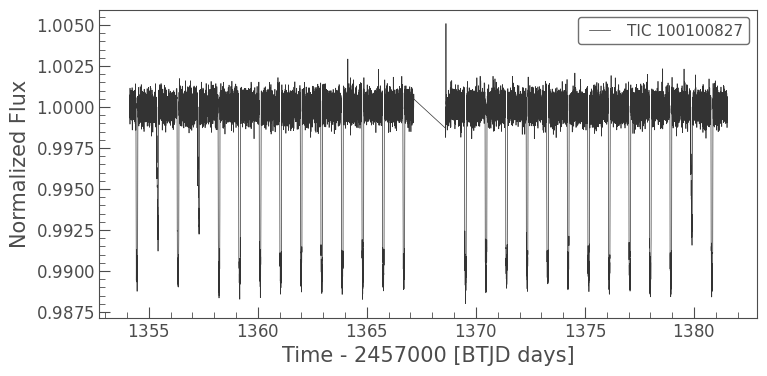

In [15]:
lc = lc_search[0].download() # Download the first item in the search result table
lc.normalize().flatten().plot()

In [16]:
# Search for all available target pixel files
tpf_search = lk.search_targetpixelfile('WASP 18')
tpf_search

SearchResult containing 13 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 02 2018      SPOC     120   100100827      0.0
  1 TESS Sector 03 2018      SPOC     120   100100827      0.0
  2 TESS Sector 29 2020      SPOC      20   100100827      0.0
  3 TESS Sector 30 2020      SPOC      20   100100827      0.0
  4 TESS Sector 29 2020      SPOC     120   100100827      0.0
  5 TESS Sector 30 2020      SPOC     120   100100827      0.0
  6 TESS Sector 69 2023      SPOC      20   100100827      0.0
  7 TESS Sector 69 2023      SPOC     120   100100827      0.0
  8 TESS Sector 02 2018 TESS-SPOC    1800   100100827      0.0
  9 TESS Sector 03 2018 TESS-SPOC    1800   100100827      0.0
 10 TESS Sector 29 2020 TESS-SPOC     600   100100827      0.0
 11 TESS Sector 30 2020 TESS-SPOC     600   100100827      0.0
 12 TESS Sector 69 2023 TESS-SPOC     200   100100827      0.0

In [17]:
tpf = tpf_search[0].download()
tpf.plot()

<Axes: title={'center': 'Target ID: 100100827, Cadence: 91190'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

In [ ]:
# Search for all available FFI images. You then then 'cutout' your own target pixel file. 
tcut_search = lk.search_tesscut('WASP 18')
tcut_search

In [ ]:
tcut = tcut_search[0].download(cutout_size=(15,20)) 
tcut.plot(frame=500)

## 6) MAST Web Portal

https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html

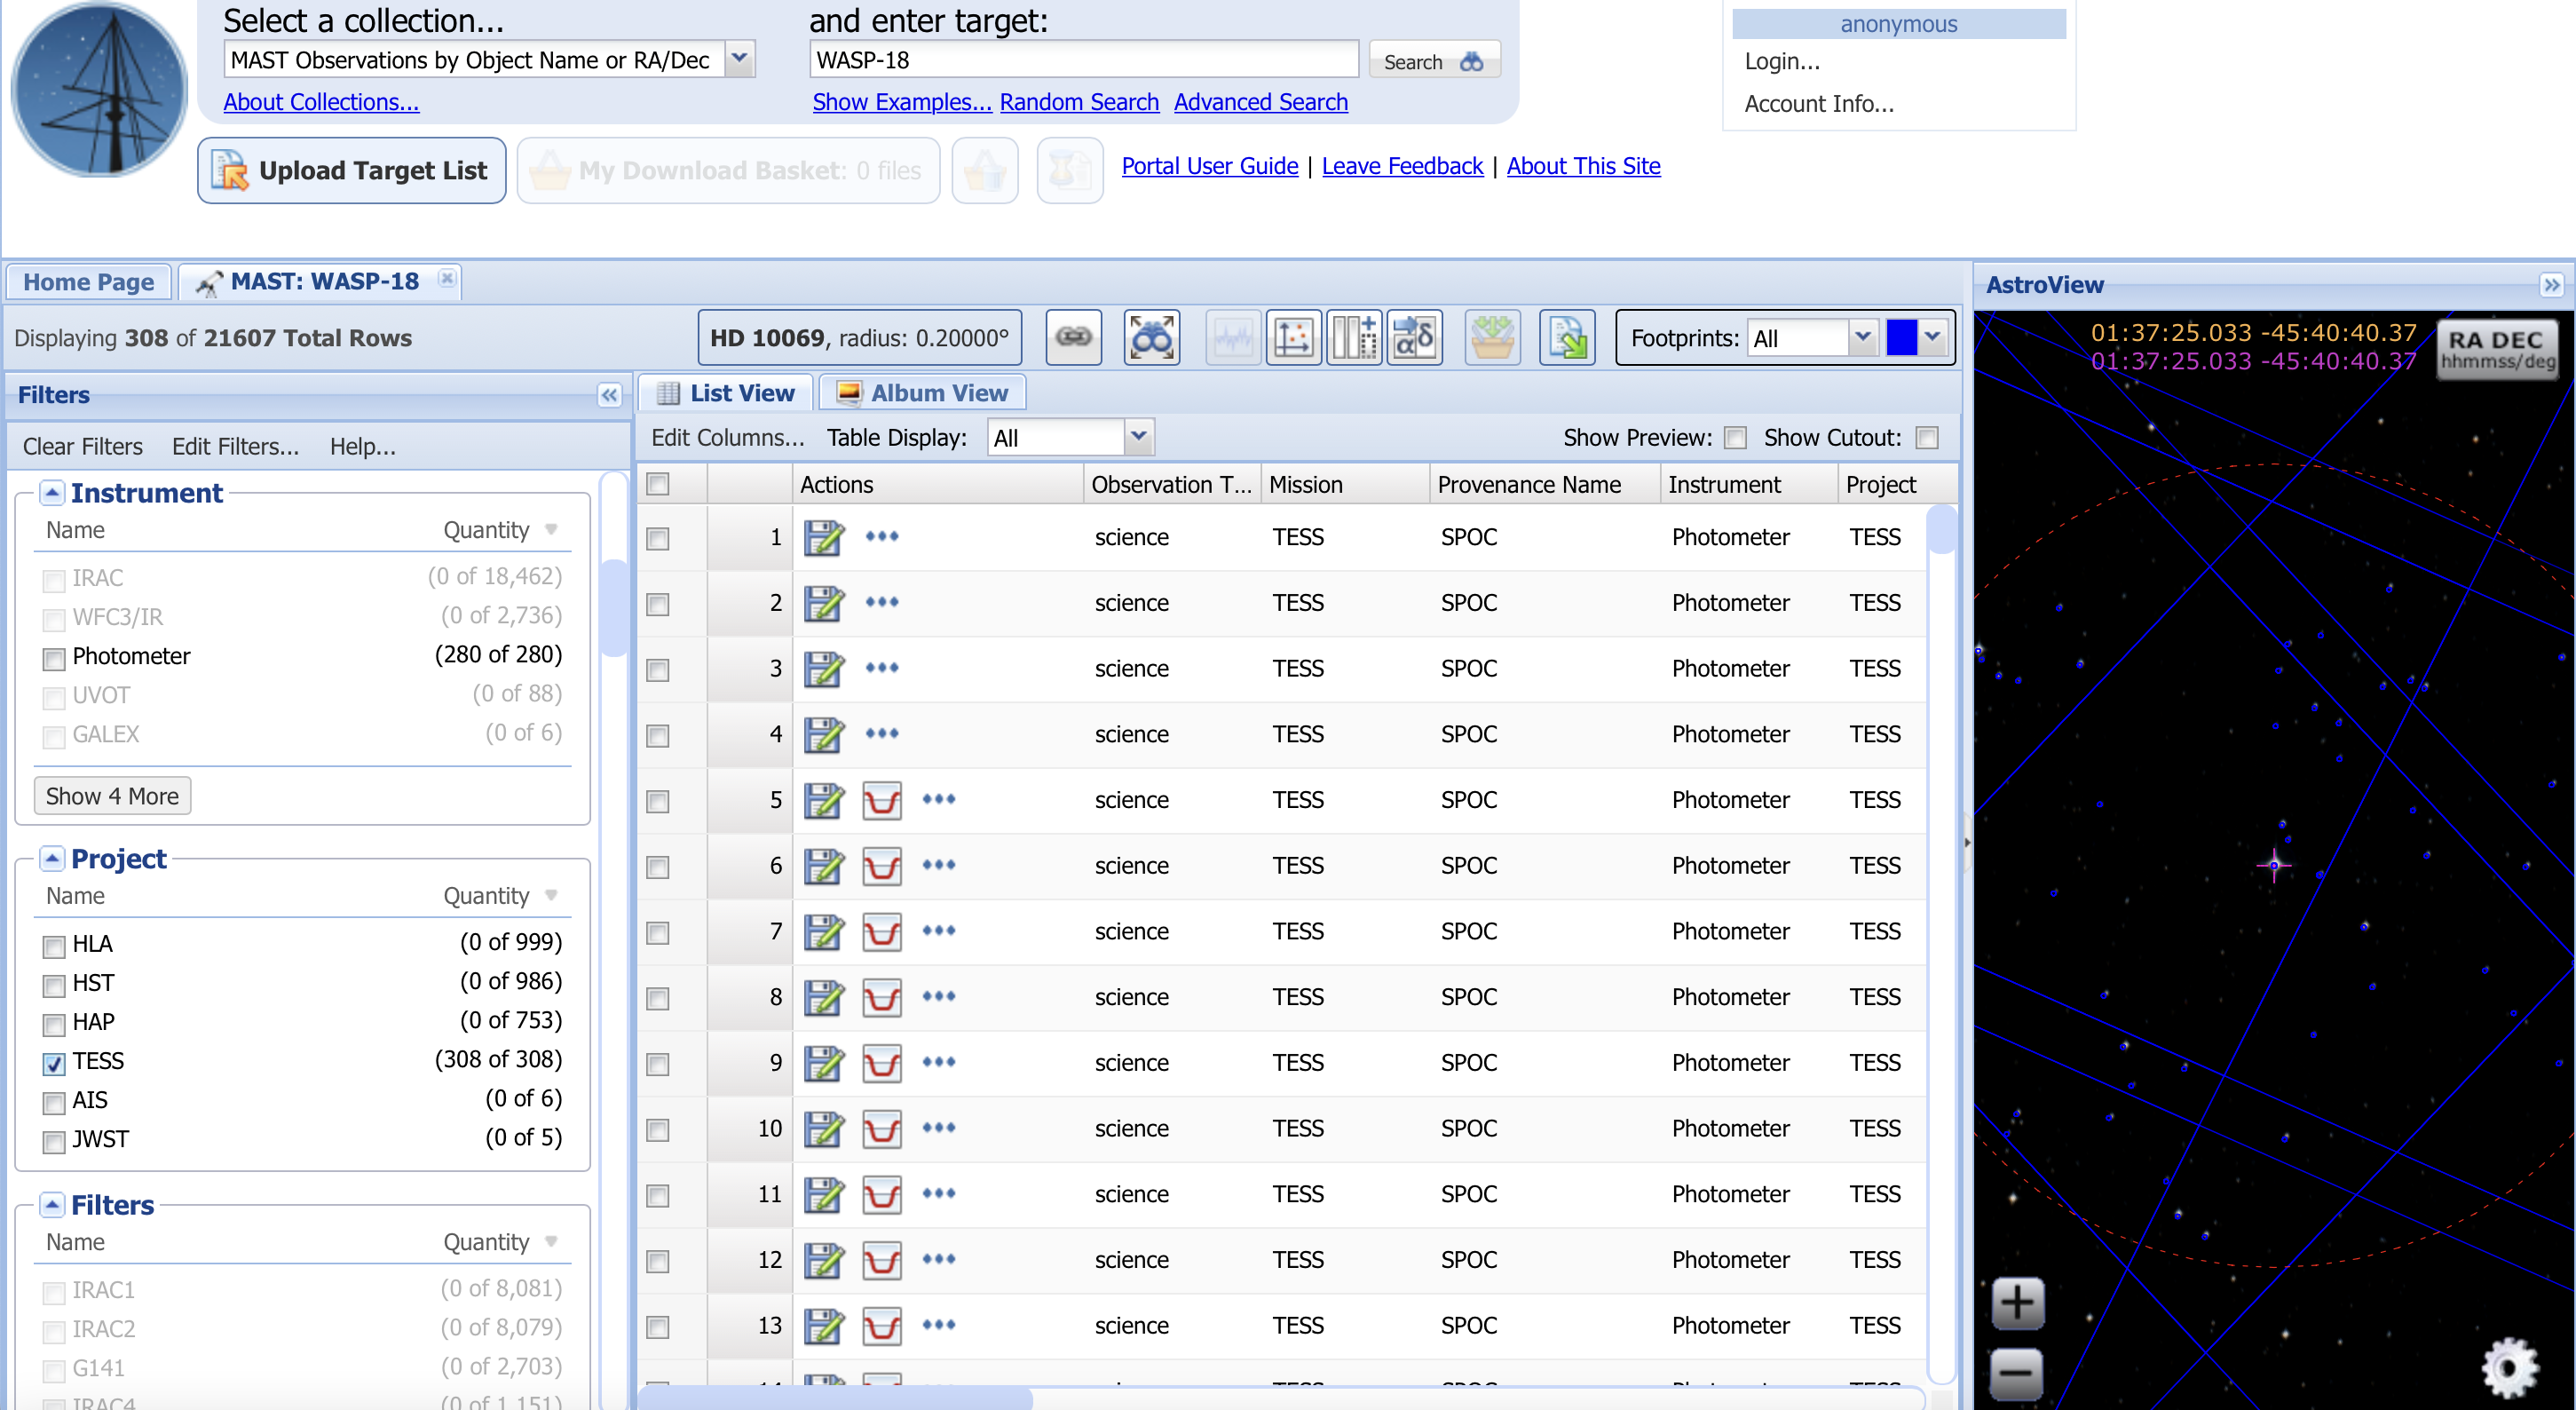


## 7) TESScut

https://masttest.stsci.edu/tesscut/

TESScut allows users to search for existing FFI data for a given target name or coordinate. After resolving a target, the web portal shows a list of available sectors. TESScut also alows users to download TICA data, a quick-look pipeline that gets FFI data to users quickly after all data downlinks. 

https://archive.stsci.edu/tess/bulk_downloads.html (bulk downloads)

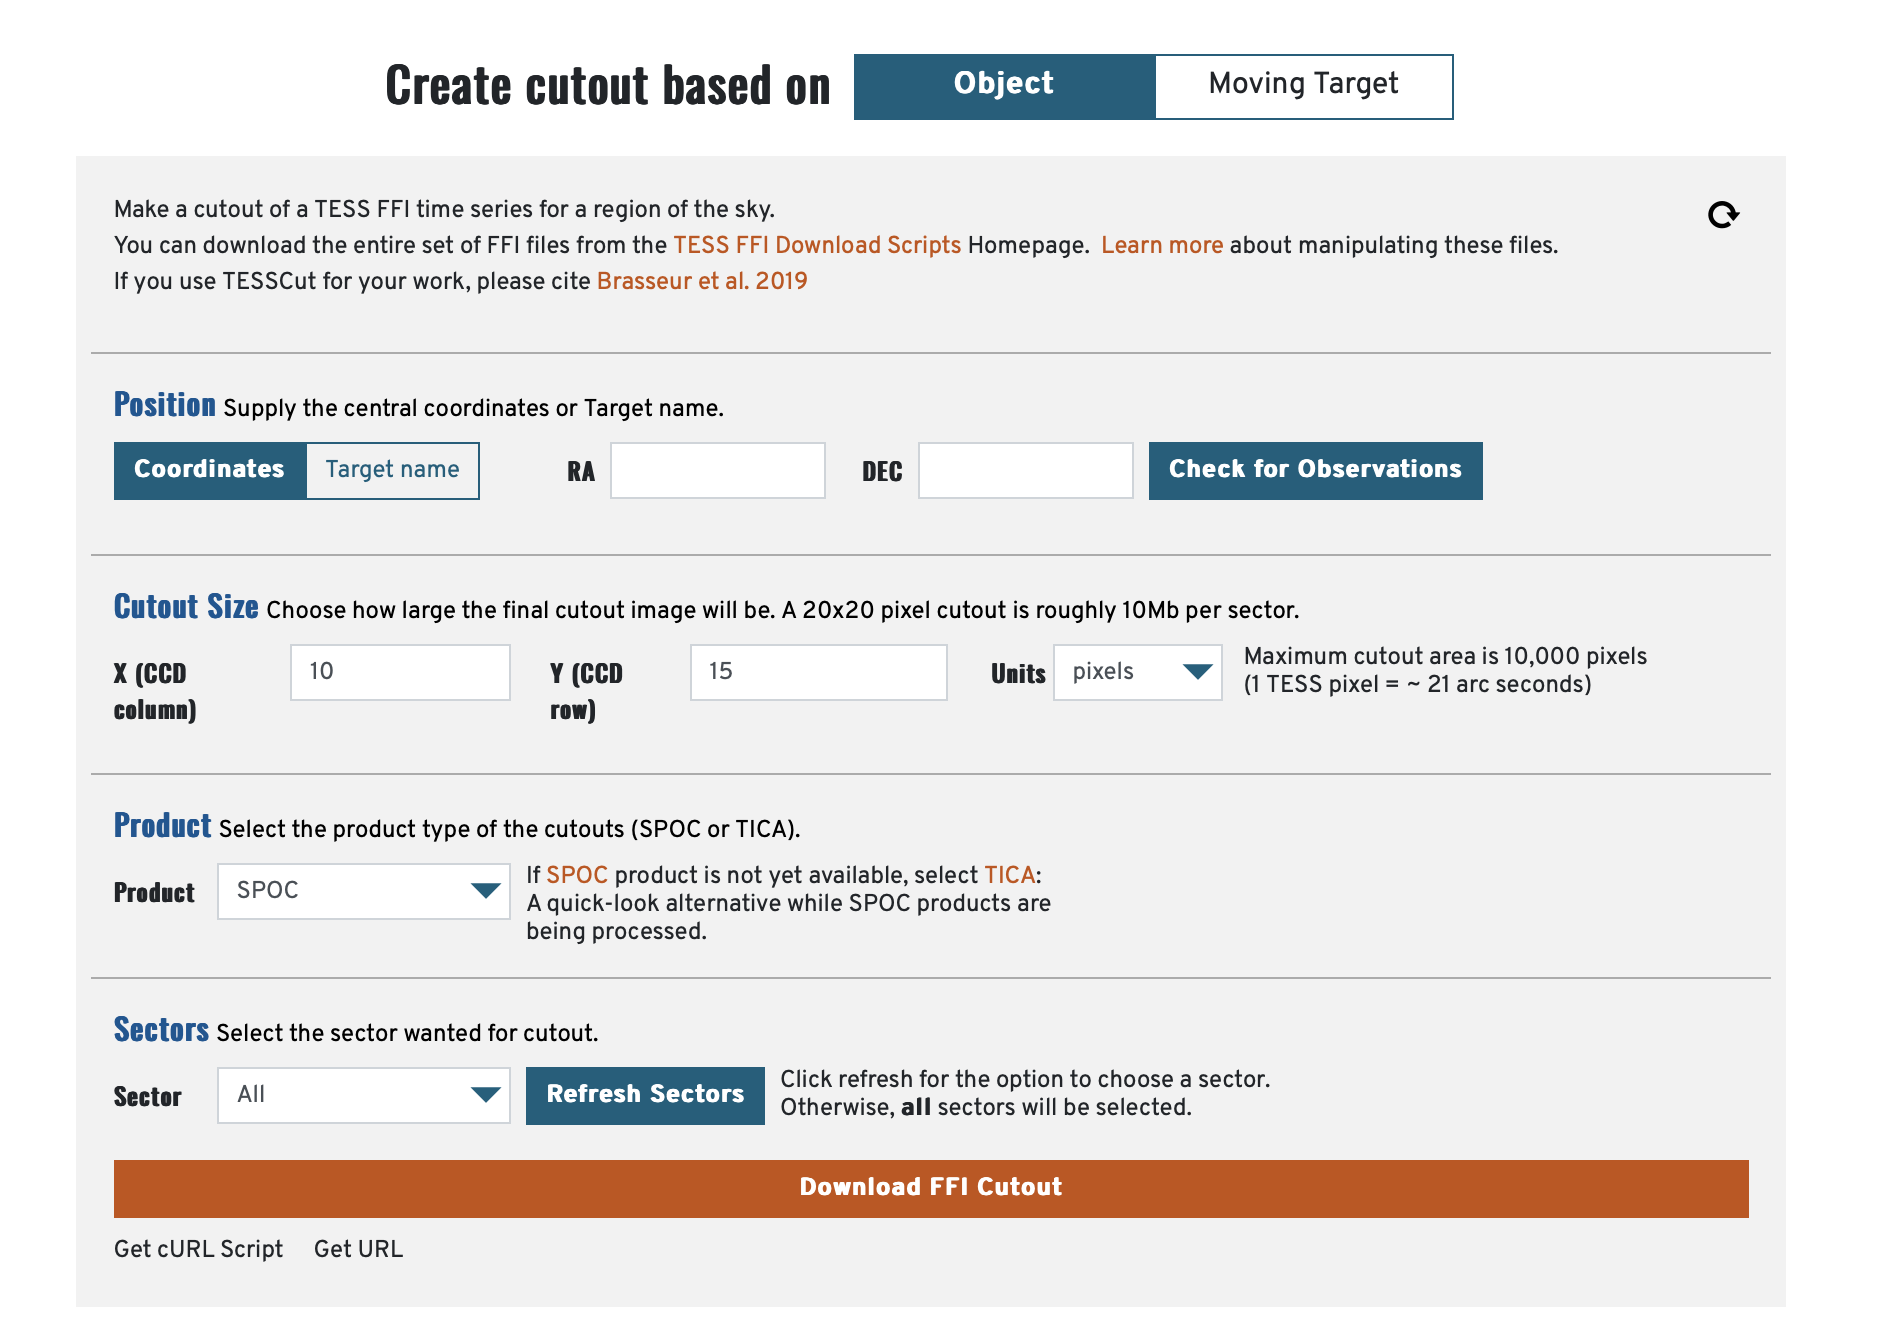

For more information on ways to get TESS data from MAST, check out the information and tutorials [here](https://outerspace.stsci.edu/display/TESS/5.0+-+Ways+To+Search+And+Interact+With+TESS+Data+At+MAST)